Regression tasks involve predicting a continuous numerical value (the target variable) based on a set of input features. `Scikit-learn` provides a variety of regression algorithms, from simple linear models to more complex ensemble methods.

## Scikit-learn: Supervised Learning - Regression

This document covers:

* **Concept:** Briefly explains the goal of regression (predicting continuous values).
* **Data Prep:** Loads the California Housing dataset, splits it into training and testing sets, and applies `StandardScaler` (emphasizing fitting only on training data).
* **Linear Models:** Demonstrates training and evaluating:
    * `LinearRegression` (OLS)
    * `Ridge` (L2 Regularization)
    * `Lasso` (L1 Regularization, showing feature selection effect)
* **Evaluation Metrics:** Uses `mean_squared_error` (MSE), `mean_absolute_error` (MAE), and `r2_score` (R-squared) to assess model performance on the test set.
* **Other Regressors:** Mentions other common regression algorithms available in `Scikit-learn`.
* **Visualization:** Includes a simple scatter plot comparing actual test values to predicted values.

---

This provides a foundation for building and evaluating regression models.

--- Loading California Housing Dataset ---
Features (X) head:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Target (y) head:
 0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

Data shape: X=(20640, 8), y=(20640,)

Train set shape: X=(16512, 8), y=(16512,)
Test set shape: X=(4128, 8), y=(4128,)

--- Scaling Features ---
Scaled Training Features head:
          MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
14196 -0.326196  0.348490 -0.174

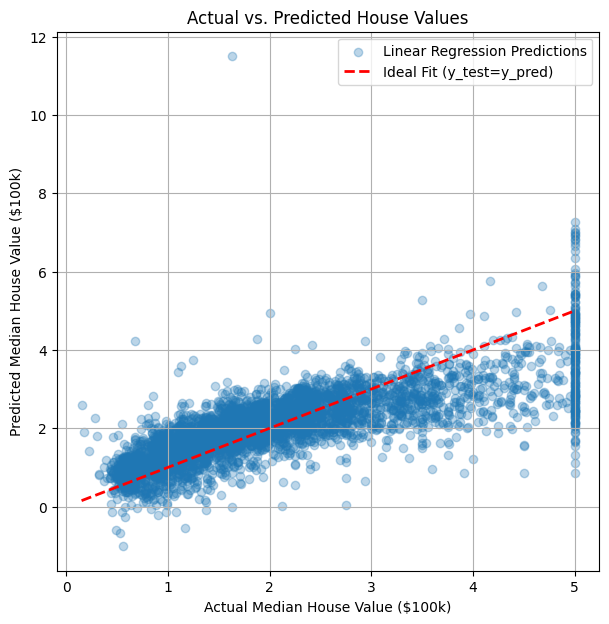

Generated scatter plot of actual vs predicted values.
------------------------------


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing, make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Import other regressors for mention/comparison (optional)
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR

# --- 1. Concept of Regression ---
# Goal: Predict a continuous output variable (e.g., house price, temperature)
# based on input features (e.g., house size, location, historical data).

# --- 2. Load and Prepare Data ---
# Using California Housing dataset
print("--- Loading California Housing Dataset ---")
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target # Target is median house value in $100,000s

print("Features (X) head:\n", X.head())
print("\nTarget (y) head:\n", y.head())
print(f"\nData shape: X={X.shape}, y={y.shape}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTrain set shape: X={X_train.shape}, y={y_train.shape}")
print(f"Test set shape: X={X_test.shape}, y={y_test.shape}")

# Scaling features is often important for linear models, especially with regularization
print("\n--- Scaling Features ---")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fit on training data only
X_test_scaled = scaler.transform(X_test) # Transform test data using training fit

# Convert scaled arrays back to DataFrames for easier viewing (optional)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)
print("Scaled Training Features head:\n", X_train_scaled_df.head())
print("-" * 30)


# --- 3. Linear Models (sklearn.linear_model) ---

print("--- Training and Evaluating Linear Models ---")

# a) Linear Regression (Ordinary Least Squares - OLS)
print("\n--- a) Linear Regression (OLS) ---")
lr = LinearRegression()
lr.fit(X_train_scaled, y_train) # Train on scaled data

# Make predictions
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr) # Or lr.score(X_test_scaled, y_test)

print(f"Linear Regression MSE: {mse_lr:.4f}")
print(f"Linear Regression MAE: {mae_lr:.4f}")
print(f"Linear Regression R2: {r2_lr:.4f}")
print(f"Intercept (lr.intercept_): {lr.intercept_:.4f}")
# print(f"Coefficients (lr.coef_): {lr.coef_}") # Model coefficients


# b) Ridge Regression (OLS + L2 Regularization)
# Regularization adds a penalty to the size of coefficients, helping prevent overfitting.
# alpha controls the strength of the penalty (higher alpha = stronger penalty).
print("\n--- b) Ridge Regression (L2 Regularization) ---")
ridge = Ridge(alpha=1.0) # Default alpha is 1.0
ridge.fit(X_train_scaled, y_train)

# Make predictions
y_pred_ridge = ridge.predict(X_test_scaled)

# Evaluate
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression (alpha=1.0) MSE: {mse_ridge:.4f}")
print(f"Ridge Regression (alpha=1.0) MAE: {mae_ridge:.4f}")
print(f"Ridge Regression (alpha=1.0) R2: {r2_ridge:.4f}")
# print(f"Ridge Coefficients (ridge.coef_): {ridge.coef_}") # Coefficients might be smaller than OLS


# c) Lasso Regression (OLS + L1 Regularization)
# L1 penalty tends to shrink some coefficients exactly to zero, performing feature selection.
print("\n--- c) Lasso Regression (L1 Regularization) ---")
lasso = Lasso(alpha=0.01) # Alpha needs careful tuning for Lasso
lasso.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lasso = lasso.predict(X_test_scaled)

# Evaluate
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression (alpha=0.01) MSE: {mse_lasso:.4f}")
print(f"Lasso Regression (alpha=0.01) MAE: {mae_lasso:.4f}")
print(f"Lasso Regression (alpha=0.01) R2: {r2_lasso:.4f}")
print(f"Number of non-zero coefficients: {np.sum(lasso.coef_ != 0)} out of {len(lasso.coef_)}")


# d) ElasticNet (Combination of L1 and L2)
# Combines penalties from Ridge and Lasso. Controlled by `alpha` (total strength)
# and `l1_ratio` (mix between L1 and L2; l1_ratio=1 is Lasso, l1_ratio=0 is Ridge).
# from sklearn.linear_model import ElasticNet
# elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
# elastic.fit(X_train_scaled, y_train)
# ... evaluation ...
print("-" * 30)


# --- 4. Other Common Regressors (Mention) ---
# Scikit-learn offers many other regression algorithms:
# - sklearn.neighbors.KNeighborsRegressor: Predicts based on nearest neighbors.
# - sklearn.tree.DecisionTreeRegressor: Uses decision rules (prone to overfitting).
# - sklearn.ensemble.RandomForestRegressor: Ensemble of Decision Trees (often performs well).
# - sklearn.ensemble.GradientBoostingRegressor: Builds trees sequentially (often high performance).
# - sklearn.svm.SVR: Support Vector Regression.
# The basic fit/predict/evaluate workflow remains the same for these estimators.
print("--- Other Regressors ---")
print("Scikit-learn includes KNeighborsRegressor, DecisionTreeRegressor,")
print("RandomForestRegressor, GradientBoostingRegressor, SVR, and more.")
print("-" * 30)


# --- 5. Visualizing Predictions vs Actuals ---
print("--- Visualizing Predictions ---")
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(y_test, y_pred_lr, alpha=0.3, label='Linear Regression Predictions')
# ax.scatter(y_test, y_pred_ridge, alpha=0.3, label='Ridge Predictions', marker='^') # Uncomment to add Ridge
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Ideal Fit (y_test=y_pred)')
ax.set_xlabel('Actual Median House Value ($100k)')
ax.set_ylabel('Predicted Median House Value ($100k)')
ax.set_title('Actual vs. Predicted House Values')
ax.legend()
ax.grid(True)
plt.show()
print("Generated scatter plot of actual vs predicted values.")
print("-" * 30)